In [404]:
import numpy as np # 넘파이, 수치해석용 파이썬 패키지지
import io #웹정보를 제공하는 정해진 알고리즘으로 불러와 사용자에게 필요한 정보로 변환
import pandas as pd #  파이썬에서 표 형태의 데이터를 탐색하고 분석하는데 사용하는 라이브러리

import matplotlib as mpl # 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
import matplotlib.pyplot as plt # MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음
import seaborn as sns # Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

import warnings # 워닝 메세지 안뜨게 하기 위해서

In [405]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #높은 해상도의 그래프 출력

mpl.rc('font', family = 'malgun_gothic') # 글자체 고딕
mpl.rc('axes', unicode_minus=False) # 유니코드 마이너스 오류 안뜨게

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore') # 에러 메세지 무시

In [406]:
# 지드라이브와 연결
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [407]:
# 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리
from sklearn.model_selection import train_test_split # 원본 데이터를 알아서 훈련 세트와 테스트 세트로 나눠줌줌
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# accuracy_score: 정답률( =정확도 )  (TP + TN) / (TP + TN + FP + FN) 진짜인걸 맞춘거 + 가짜인걸 맞춘거 / 전체
# precision_score: 정밀도  TP / (FP + TP) 진짜인걸 맞춘거 / 긍정적 예측을 실패한것(실제론 썩은밤) + 진짜인걸 맞춘거
# recall_score: 재현율 TP / (FN + TP) 진짜인걸 맞춘거 / 부정적인 예측을 실패한것(실제론 맛있는 밤) + 진짜인걸 맞춘거
# roc_auc_score:  167p 공룡, 이진 분류의 예측 성능 측정에 중요하게 사용되는 지표

from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# f1_score: 정밀도 * 재현율 / 정밀도 + 재현율
# precision_recall_curve: Parameter인 Threshold를 변화시키면서 Precision과 Recall을 Plot 한 Curve입니다. 
## Precision-Recall Curves는 X축으로는 Recall을, Y축으로는 Precision을 가집니다.
## Precision-Recall Curve는 단조함수가 아닙니다. 이러한 이유로 ROC Curve보다 직관적이지 못하다는 단점을 가집니다.
# roc_curve: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 변화를 나타내는 곡선

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

house_train = pd.read_csv('/content/gdrive/MyDrive/kaggle/train.csv')
house_test = pd.read_csv('/content/gdrive/MyDrive/kaggle/test.csv')
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [408]:
house_train_scatter_color = house_train.copy()

In [409]:
def find_outlier(data):
    for i in data.columns:
        if data[i].dtype != object:
            q1, q3 = np.percentile(data[i], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)
            mask = np.where((data[i] > upper_bound) | (data[i]< lower_bound))
            a = i +'_col'
            data[a] = 'blue'
            for j in mask:
                data[a][j] = 'red'

In [410]:
# int 타입의 범주형들의 형태를 바꾸어 줍니다.
#house_train_scatter_color[''] = house_train_scatter_color[''].astype(str)
#house_train_scatter_color[''] = house_train_scatter_color[''].astype(str)
#house_train_scatter_color[''] = house_train_scatter_color[''].astype(str)
house_train_scatter_color['FullBath'] = house_train_scatter_color['FullBath'].astype(str)
house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)
house_train_scatter_color['GarageCars'] = house_train_scatter_color['GarageCars'].astype(str)
house_train_scatter_color['Fireplaces'] = house_train_scatter_color['Fireplaces'].astype(str)
house_train_scatter_color['TotRmsAbvGrd'] = house_train_scatter_color['TotRmsAbvGrd'].astype(str)
house_train_scatter_color['KitchenAbvGr'] = house_train_scatter_color['KitchenAbvGr'].astype(str)
house_train_scatter_color['BedroomAbvGr'] = house_train_scatter_color['BedroomAbvGr'].astype(str)
house_train_scatter_color['HalfBath'] = house_train_scatter_color['HalfBath'].astype(str)
house_train_scatter_color['BsmtFullBath'] = house_train_scatter_color['BsmtFullBath'].astype(str)
house_train_scatter_color['BsmtHalfBath'] = house_train_scatter_color['BsmtHalfBath'].astype(str)
house_train_scatter_color['BsmtFullBath'] = house_train_scatter_color['BsmtFullBath'].astype(str)
house_train_scatter_color['YrSold'] = house_train_scatter_color['YrSold'].astype(str)
house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)
house_train_scatter_color['GarageYrBlt'] = house_train_scatter_color['GarageYrBlt'].astype(str)
house_train_scatter_color['YearRemodAdd'] = house_train_scatter_color['YearRemodAdd'].astype(str)
house_train_scatter_color['YearBuilt'] = house_train_scatter_color['YearBuilt'].astype(str)
house_train_scatter_color['OverallQual'] = house_train_scatter_color['OverallQual'].astype(str)
house_train_scatter_color['MSSubClass'] = house_train_scatter_color['MSSubClass'].astype(str)
house_train_scatter_color['OverallCond'] = house_train_scatter_color['OverallCond'].astype(str)
house_train_scatter_color['YrSold'] = house_train_scatter_color['YrSold'].astype(str)
house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)

In [411]:
house_train_scatter_color_numeric = house_train_scatter_color[house_train_scatter_color.dtypes[house_train_scatter_color.dtypes != object].index].drop('Id', axis = 1)

In [412]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


In [413]:
house_train_scatter_color_numeric['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64

In [414]:
for i in house_train_scatter_color_numeric.columns:
  print(house_train_scatter_color_numeric[i].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257

In [415]:
- MiscVal
- PoolArea
- ScreenPorch
- 3SsnPorch
- EnclosedPorch
- LowQualFinSF
- BsmtFinSF2

SyntaxError: ignored

In [416]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


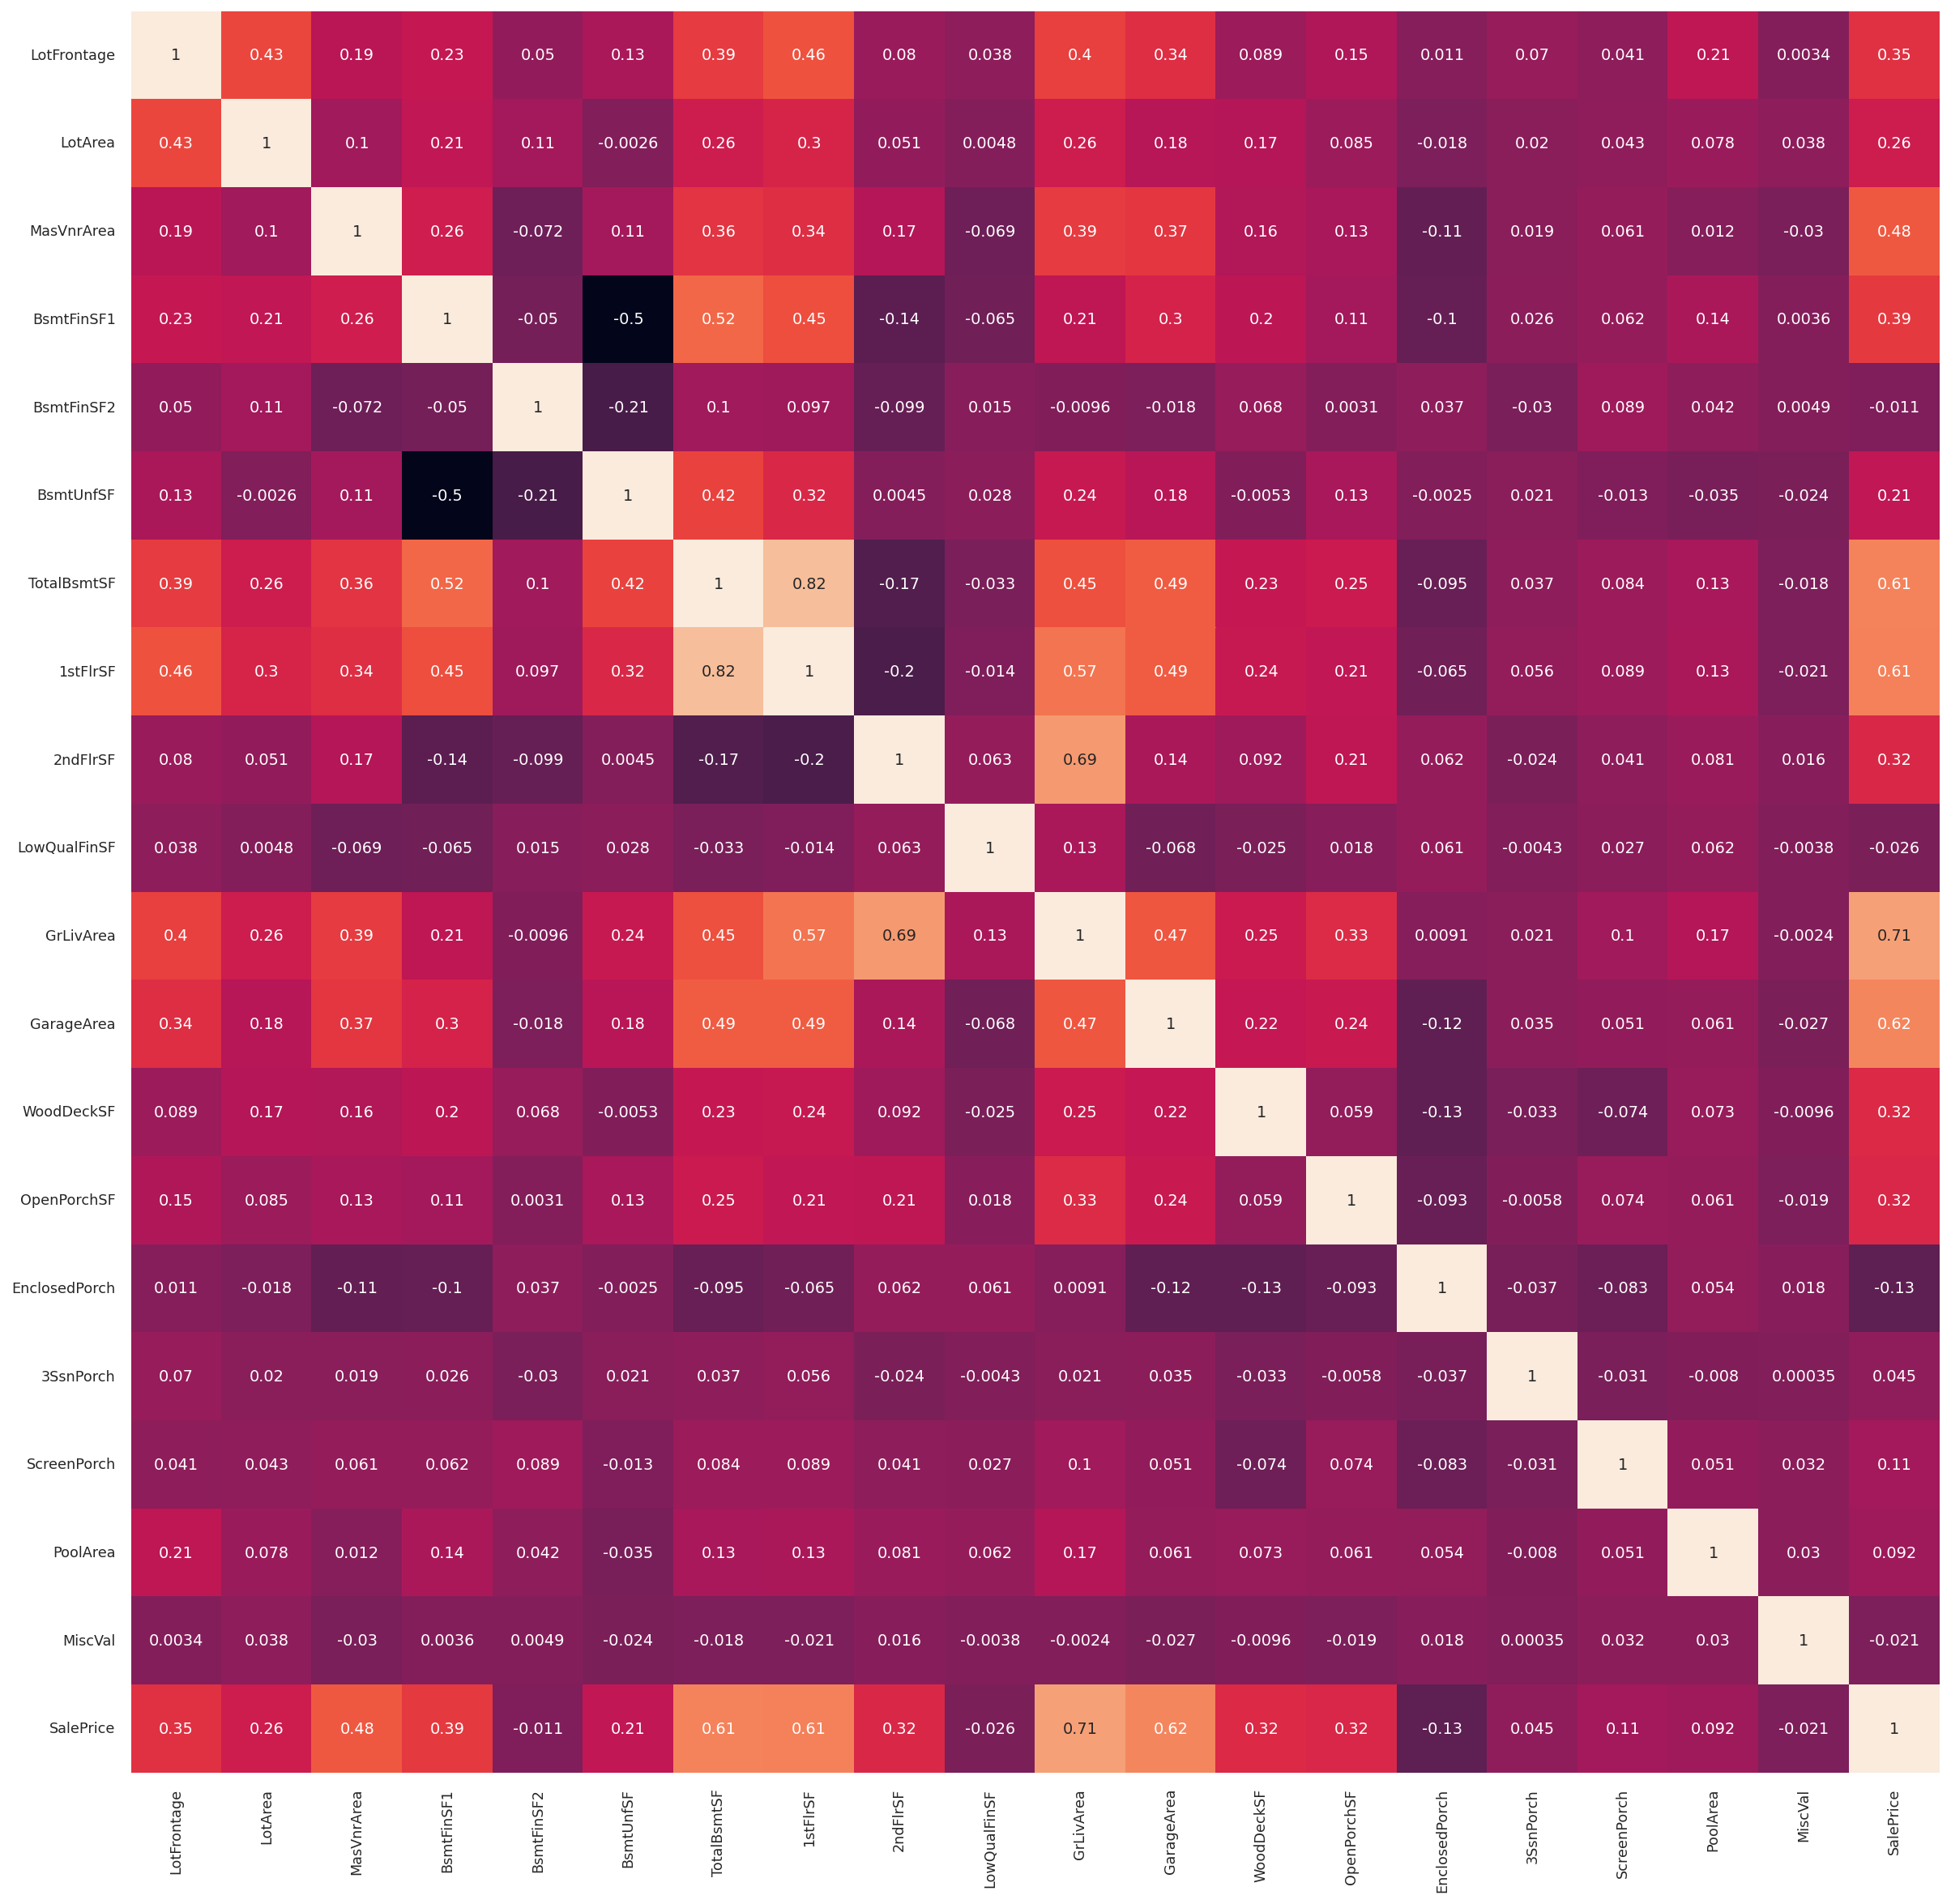

In [417]:
house_train_scatter_color_numeric_corr = house_train_scatter_color_numeric.corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(house_train_scatter_color_numeric_corr, annot=True, cbar=False)
plt.show()

In [418]:
huse_train_numeric_droped = house_train_scatter_color_numeric.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2'], axis =1)
huse_train_numeric_droped

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,208500
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,181500
2,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,223500
3,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,140000
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,953,953,953,694,1647,460,0,40,175000
1456,85.0,13175,119.0,790,589,1542,2073,0,2073,500,349,0,210000
1457,66.0,9042,0.0,275,877,1152,1188,1152,2340,252,0,60,266500
1458,68.0,9717,0.0,49,0,1078,1078,0,1078,240,366,0,142125


In [419]:
huse_train_numeric_droped_columns = huse_train_numeric_droped.drop(['SalePrice'], axis = 1).columns

In [420]:
# 0이 전부 > 영향이 없음
# 0이 대부분 > 영향이 적음or  영향이 거의 없음
# > 해당칼럼의 값이 0일때 타겟값이 일정하고 양 또는 음의 상관관계도 있지 않을까?
# > 생각보다 더 높은 상관관계
# 알고보니 컬럼명이 아래에 뜨는거였음

In [421]:
c_huse_train_numeric_droped = huse_train_numeric_droped.copy()

In [422]:
c_huse_train_numeric_droped.isnull().sum()

LotFrontage    259
LotArea          0
MasVnrArea       8
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
SalePrice        0
dtype: int64

In [423]:
c_huse_train_numeric_droped = c_huse_train_numeric_droped.fillna(c_huse_train_numeric_droped.loc[:, "LotFrontage"].median())

In [424]:
# 타겟 로그 스케일
c_huse_train_numeric_droped['SalePrice'] = np.log(c_huse_train_numeric_droped['SalePrice'])

In [462]:
house_train_numeric_droped_columns = ['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']
def get_scaled_data(input_data=None):
  global scaled_ss_data
  global scaled_mm_data
  global scaled_lg_data
  scaled_ss_data = StandardScaler().fit_transform(input_data)
  scaled_ss_data = pd.DataFrame(scaled_ss_data)
  scaled_ss_data.columns = house_train_numeric_droped_columns

  scaled_mm_data = MinMaxScaler().fit_transform(input_data)
  scaled_mm_data = pd.DataFrame(scaled_mm_data)
  scaled_mm_data.columns = house_train_numeric_droped_columns

  scaled_lg_data = np.log1p(input_data)
  scaled_lg_data = pd.DataFrame(scaled_lg_data)
  scaled_lg_data.columns = house_train_numeric_droped_columns 


  non_scaled_data = input_data
  return scaled_ss_data, scaled_mm_data, scaled_lg_data, non_scaled_data

In [463]:
scaled_ss_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,-0.220875,-0.207142,0.512420,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,0.351000,-0.752176,0.216503
1,0.460320,-0.091886,-0.573300,1.171992,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.060731,1.626195,-0.704483
2,-0.084636,0.073480,0.324081,0.092907,-0.301643,-0.313369,-0.627826,1.189351,0.515013,0.631726,-0.752176,-0.070361
3,-0.447940,-0.096897,-0.573300,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,0.383659,0.790804,-0.752176,-0.176048
4,0.641972,0.375148,1.365485,0.463568,-0.174865,0.199680,-0.045611,1.617877,1.299326,1.698485,0.780197,0.563760
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.573300,-0.973018,0.873321,-0.238122,-0.542435,0.795198,0.250402,-0.060731,-0.752176,-0.100558
1456,0.687385,0.266407,0.085887,0.759659,0.049262,1.104925,2.355701,-0.795163,1.061367,0.126420,2.033231,-0.704483
1457,-0.175462,-0.147810,-0.573300,-0.369871,0.701265,0.215641,0.065656,1.844744,1.569647,-1.033914,-0.752176,0.201405
1458,-0.084636,-0.080160,-0.573300,-0.865548,-1.284176,0.046905,-0.218982,-0.795163,-0.832788,-1.090059,2.168910,-0.704483


In [464]:
scaled_mm_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,0.150685,0.033420,0.122500,0.125089,0.064212,0.140098,0.119780,0.413559,0.259231,0.386460,0.000000,0.111517
1,0.202055,0.038795,0.000000,0.173281,0.121575,0.206547,0.212942,0.000000,0.174830,0.324401,0.347725,0.000000
2,0.160959,0.046507,0.101250,0.086109,0.185788,0.150573,0.134465,0.419370,0.273549,0.428773,0.000000,0.076782
3,0.133562,0.038561,0.000000,0.038271,0.231164,0.123732,0.143873,0.366102,0.260550,0.452750,0.000000,0.063985
4,0.215753,0.060576,0.218750,0.116052,0.209760,0.187398,0.186095,0.509927,0.351168,0.589563,0.224037,0.153565
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.000000,0.000000,0.407962,0.155974,0.142038,0.336077,0.247362,0.324401,0.000000,0.073126
1456,0.219178,0.055505,0.074375,0.139972,0.252140,0.252373,0.399036,0.000000,0.327619,0.352609,0.407235,0.000000
1457,0.154110,0.036187,0.000000,0.048724,0.375428,0.188543,0.195961,0.557869,0.377920,0.177715,0.000000,0.109689
1458,0.160959,0.039342,0.000000,0.008682,0.000000,0.176432,0.170721,0.000000,0.140166,0.169252,0.427071,0.000000


In [465]:
scaled_lg_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,4.189655,9.042040,5.283204,6.561031,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134
1,4.394449,9.169623,0.000000,6.886532,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000
2,4.234107,9.328212,5.093750,6.188264,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200
3,4.110874,9.164401,0.000000,5.379897,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519
4,4.442651,9.565284,5.860786,6.486161,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,7.407318,6.133398,0.000000,3.713572
1456,4.454347,9.486152,4.787492,6.673298,6.380123,7.341484,7.637234,0.000000,7.637234,6.216606,5.857933,0.000000
1457,4.204693,9.109746,0.000000,5.620401,6.777647,7.050123,7.080868,7.050123,7.758333,5.533389,0.000000,4.110874
1458,4.234107,9.181735,0.000000,3.912023,0.000000,6.983790,6.983790,0.000000,6.983790,5.484797,5.905362,0.000000


In [430]:
gest_scaled_data(a)

(      LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
 0       -0.220875 -0.207142    0.512420    0.575425  -0.944591    -0.459303   
 1        0.460320 -0.091886   -0.573300    1.171992  -0.641228     0.466465   
 2       -0.084636  0.073480    0.324081    0.092907  -0.301643    -0.313369   
 3       -0.447940 -0.096897   -0.573300   -0.499274  -0.061670    -0.687324   
 4        0.641972  0.375148    1.365485    0.463568  -0.174865     0.199680   
 ...           ...       ...         ...         ...        ...          ...   
 1455    -0.357114 -0.260560   -0.573300   -0.973018   0.873321    -0.238122   
 1456     0.687385  0.266407    0.085887    0.759659   0.049262     1.104925   
 1457    -0.175462 -0.147810   -0.573300   -0.369871   0.701265     0.215641   
 1458    -0.084636 -0.080160   -0.573300   -0.865548  -1.284176     0.046905   
 1459     0.233255 -0.058112   -0.573300    0.847389  -0.976285     0.452784   
 
       1stFlrSF  2ndFlrSF  GrLivArea  

In [431]:
#scaled_ss_data = pd.DataFrame(scaled_ss_data)

In [432]:
#scaled_ss_data.columns = list(huse_train_numeric_droped_columns)

In [433]:
#house_train_numeric_droped_columns = ['LotFrontage',
# 'LotArea',
# 'MasVnrArea',
# 'BsmtFinSF1',
# 'BsmtUnfSF',
# 'TotalBsmtSF',
# '1stFlrSF',
# '2ndFlrSF',
# 'GrLivArea',
# 'GarageArea',
# 'WoodDeckSF',
# 'OpenPorchSF']

In [434]:
# scaled_ss_data

In [435]:
# c_huse_train_numeric_droped = c_huse_train_numeric_droped.fillna(c_huse_train_numeric_droped.loc[:, "LotFrontage"].median())

In [436]:
# c_huse_train_numeric_droped.loc[:, "LotFrontage"].median()

In [437]:
# c_huse_train_numeric_droped.loc[:, "LotFrontage"].mode()

In [438]:
c_huse_train_numeric_droped.iloc[:, -1]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# 집값예측 모델 개발(현) 적용하기

In [467]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [469]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = c_huse_train_numeric_droped.iloc[:, -1]
X_features = scaled_lg_data

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.215
Ridge 로그 변환된 RMSE: 0.214
Lasso 로그 변환된 RMSE: 0.408


[0.2149212965456275, 0.21440646563766413, 0.407578629382704]

In [441]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error


# y_target = c_huse_train_numeric_droped.iloc[:, -1]
# X_features = scaled_mm_data

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# # LinearRegression, Ridge, Lasso 학습, 예측, 평가
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)

# ridge_reg = Ridge()
# ridge_reg.fit(X_train, y_train)

# lasso_reg = Lasso()
# lasso_reg.fit(X_train, y_train)

# models = [lr_reg, ridge_reg, lasso_reg]
# get_rmses(models)

In [442]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# y_target = c_huse_train_numeric_droped['SalePrice']
# X_features = c_huse_train_numeric_droped.drop('SalePrice',axis=1, inplace=False)

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# # LinearRegression, Ridge, Lasso 학습, 예측, 평가
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)

# ridge_reg = Ridge()
# ridge_reg.fit(X_train, y_train)

# lasso_reg = Lasso()
# lasso_reg.fit(X_train, y_train)

# models = [lr_reg, ridge_reg, lasso_reg]
# get_rmses(models)

In [443]:
y_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [470]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient(계수=상관관계를 숫자로 치환한거고 음/양 다 있음) 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


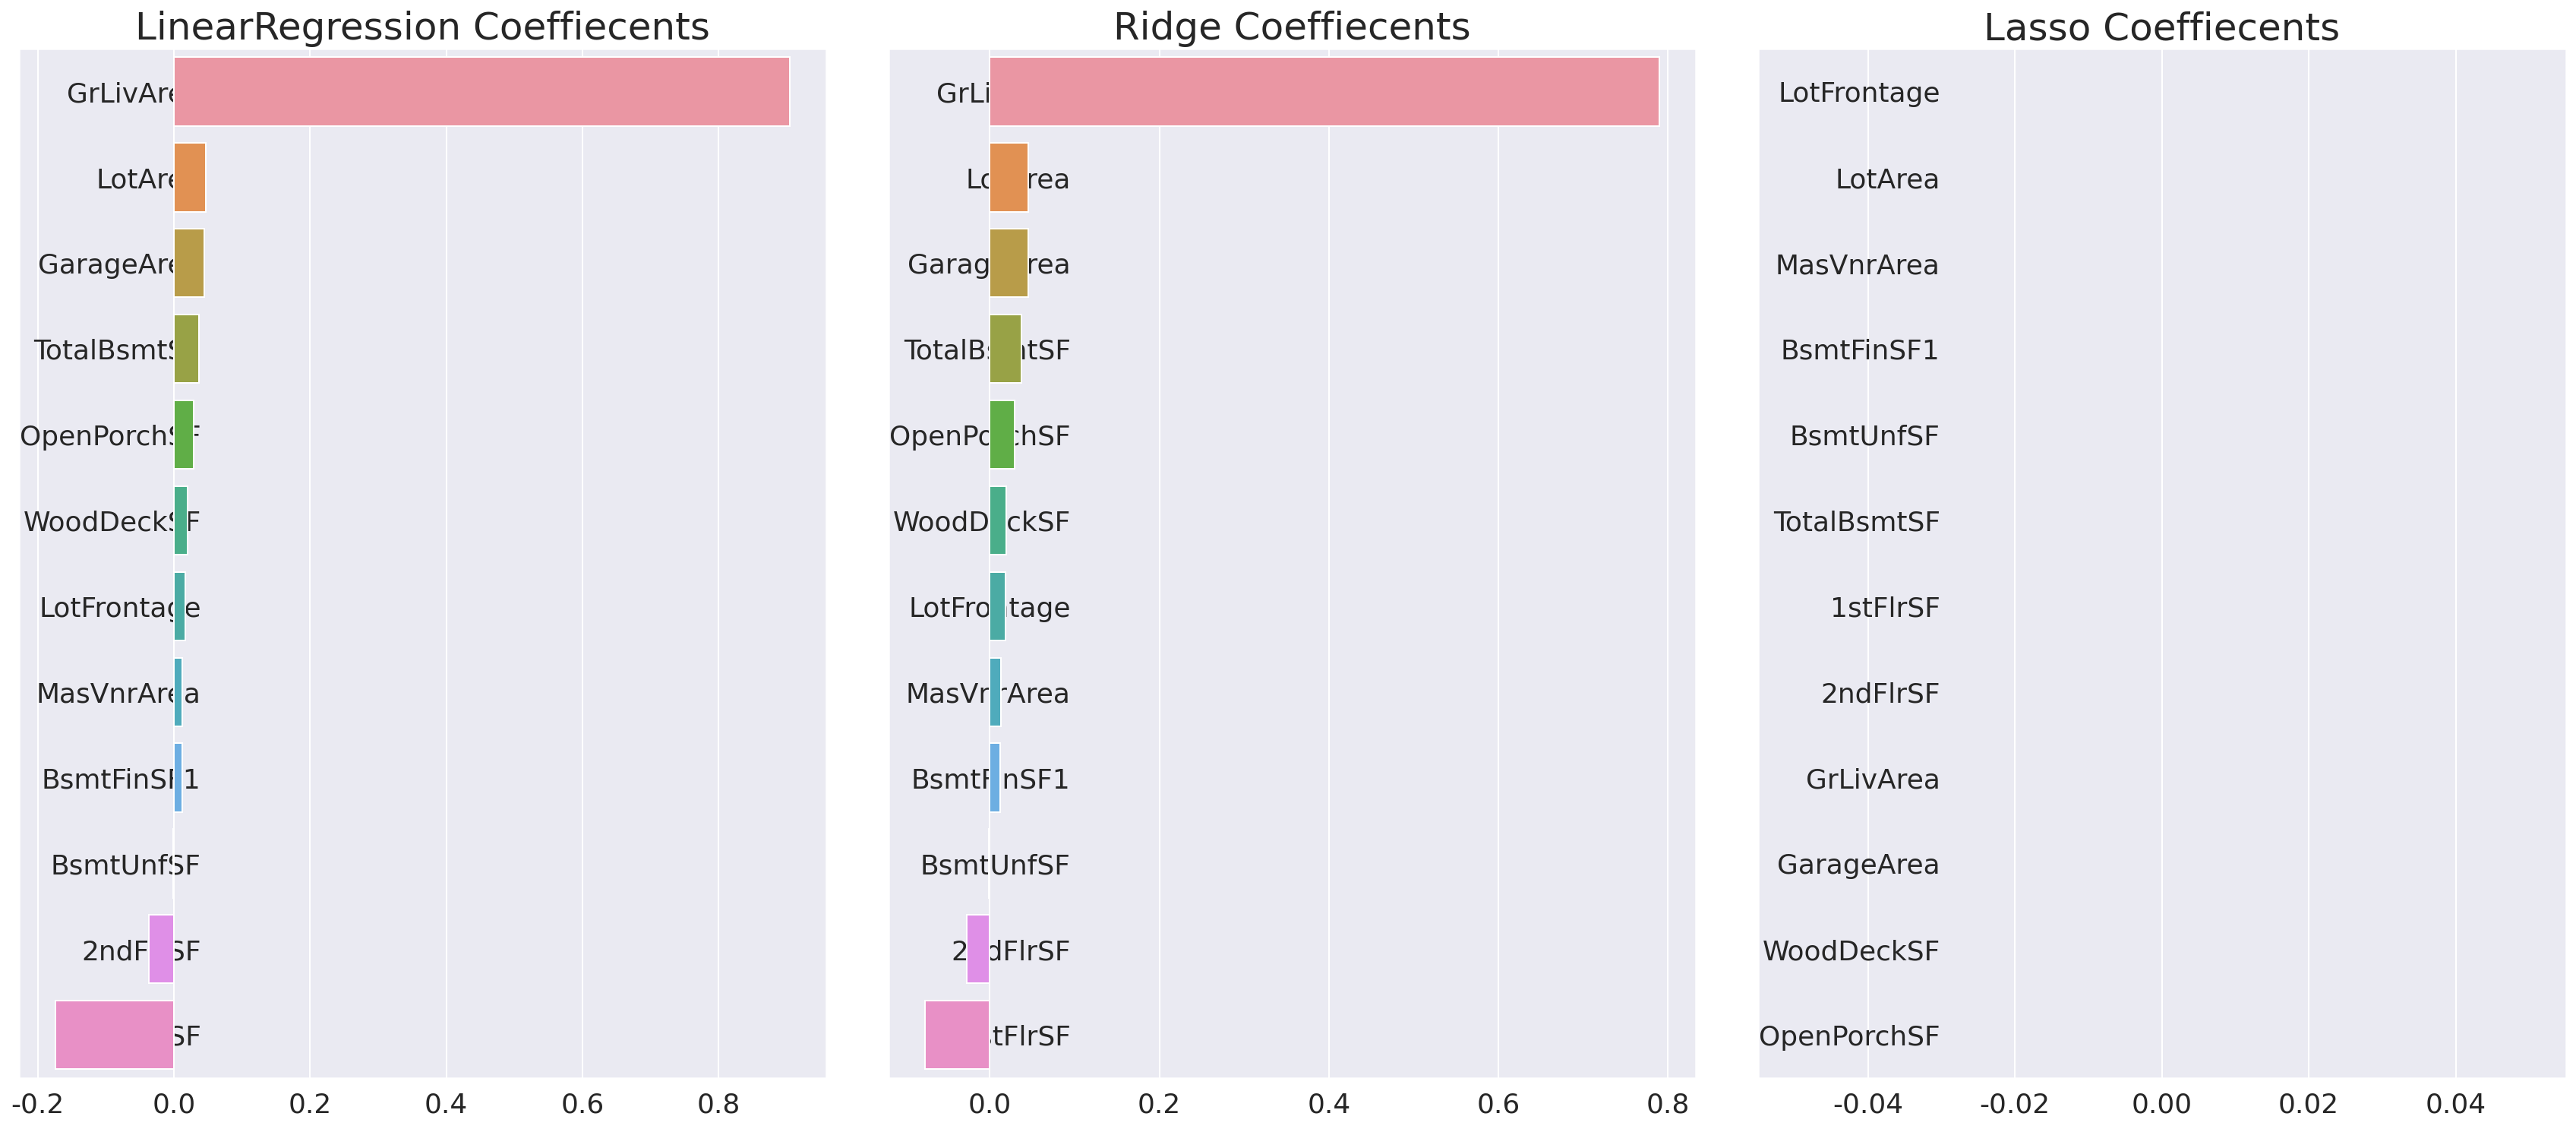

In [471]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat(하나의 데이터프레임으로 붙여줌)으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick(축axis) label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(18)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [472]:

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5)) # 교차검증 횟수를 5번 설정해줘서 값이 5개 나옴
        rmse_avg = np.mean(rmse_list) # 위에서 나온 값 5개의 평균
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))  # 소숫점 셋째자리에서 반올림
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.193 0.217 0.207 0.209 0.221]
LinearRegression CV 평균 RMSE 값: 0.21

Ridge CV RMSE 값 리스트: [0.192 0.218 0.206 0.21  0.222]
Ridge CV 평균 RMSE 값: 0.21

Lasso CV RMSE 값 리스트: [0.387 0.425 0.41  0.383 0.391]
Lasso CV 평균 RMSE 값: 0.399


In [473]:
# 5개의 폴드 세트로 학습한 후에도 여전히 라쏘의 경우 릿지 모델보다 성능이 떨어짐
# 릿지와 라쏘 모델에 대해 alpha 하이퍼 파라미터를 변화시키면서 최적값을 도출해보려고 함
# 앞으로 모델별로 최적화 하이퍼 파라미터 작업을 반복적으로 작업할것이므로 함수를 생성해줌
# model과 params(하이퍼파라미터 딕셔너리 객체)를 받아서 최적화 작업의 결과를 표시하는 함수

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2097, 최적 alpha:{'alpha': 0.1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2096, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.215
Ridge 로그 변환된 RMSE: 0.216
Lasso 로그 변환된 RMSE: 0.214


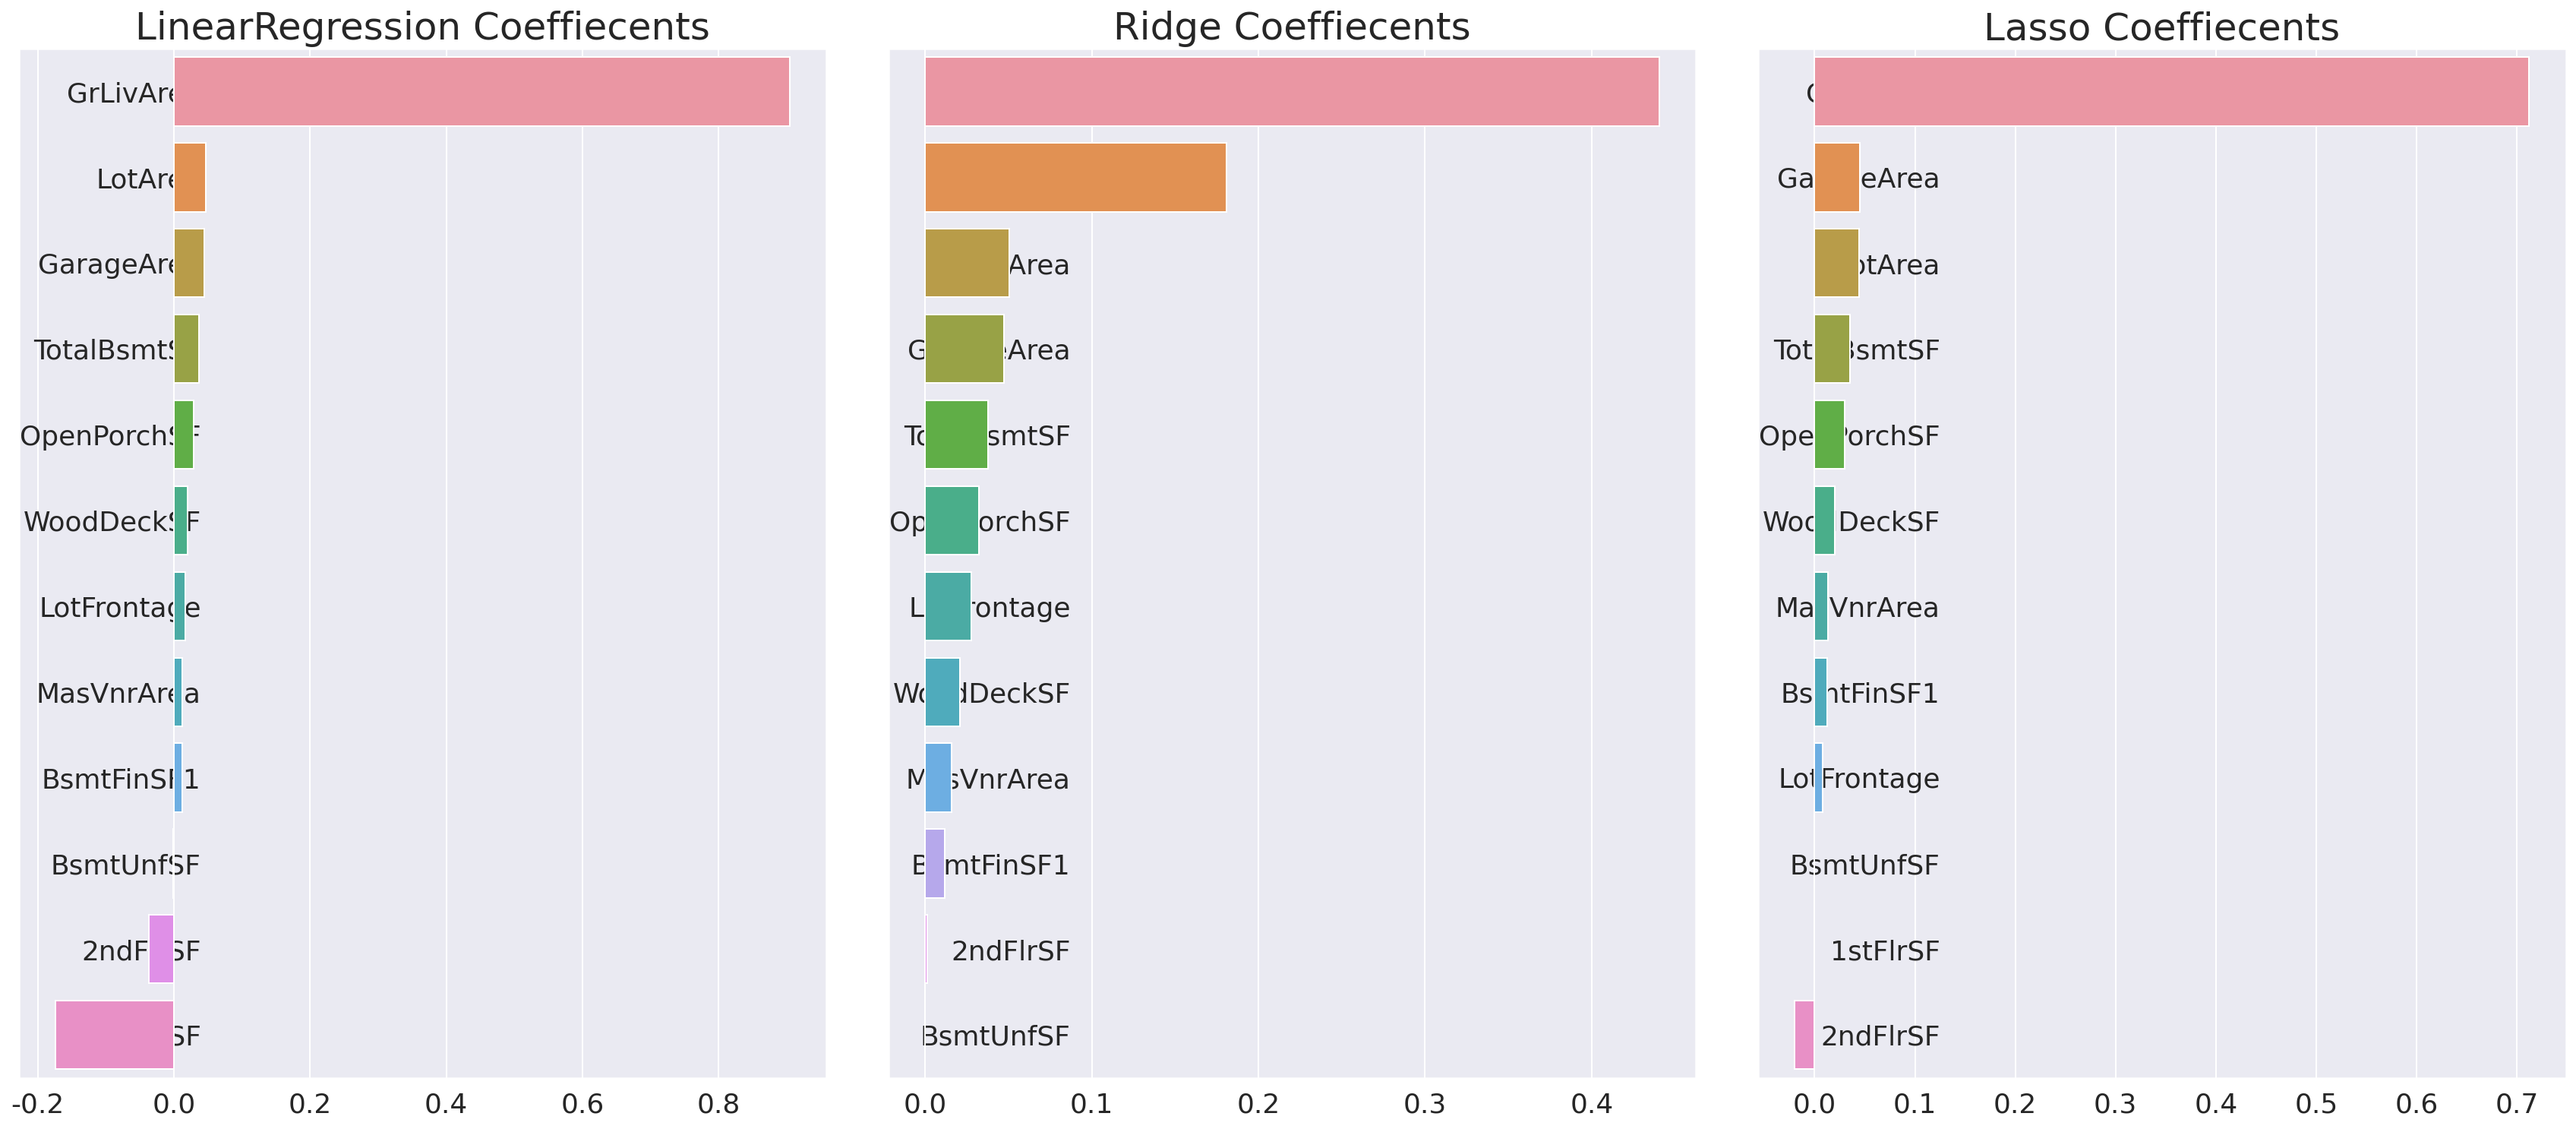

In [474]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [475]:
################################################################################
########################### 변수명 수정 할 것것
# from scipy.stats import skew 
# # 왜도(치우쳐진 정도)

# # object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
# features_index = c_huse_train_numeric_droped.dtypes[c_huse_train_numeric_droped.dtypes != 'object'].index
# # house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
# skew_features = c_huse_train_numeric_droped[features_index].apply(lambda x : skew(x))
# # skew(왜곡) 정도가 1 이상인 칼럼만 추출.
# skew_features_top = skew_features[skew_features > 1]
# print(skew_features_top.sort_values(ascending=False))

LotArea        12.195142
MasVnrArea      2.675974
LotFrontage     2.406671
OpenPorchSF     2.361912
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
1stFlrSF        1.375342
GrLivArea       1.365156
dtype: float64


In [450]:
###### 
# c_huse_train_numeric_droped[skew_features_top.index] = np.log1p(c_huse_train_numeric_droped[skew_features_top.index])

In [451]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
c_huse_train_numeric_droped = pd.get_dummies(c_huse_train_numeric_droped)
y_target = c_huse_train_numeric_droped['SalePrice']
X_features = c_huse_train_numeric_droped.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2318, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2298, 최적 alpha:{'alpha': 0.5}


LinearRegression 로그 변환된 RMSE: 0.21
Ridge 로그 변환된 RMSE: 0.21
Lasso 로그 변환된 RMSE: 0.21


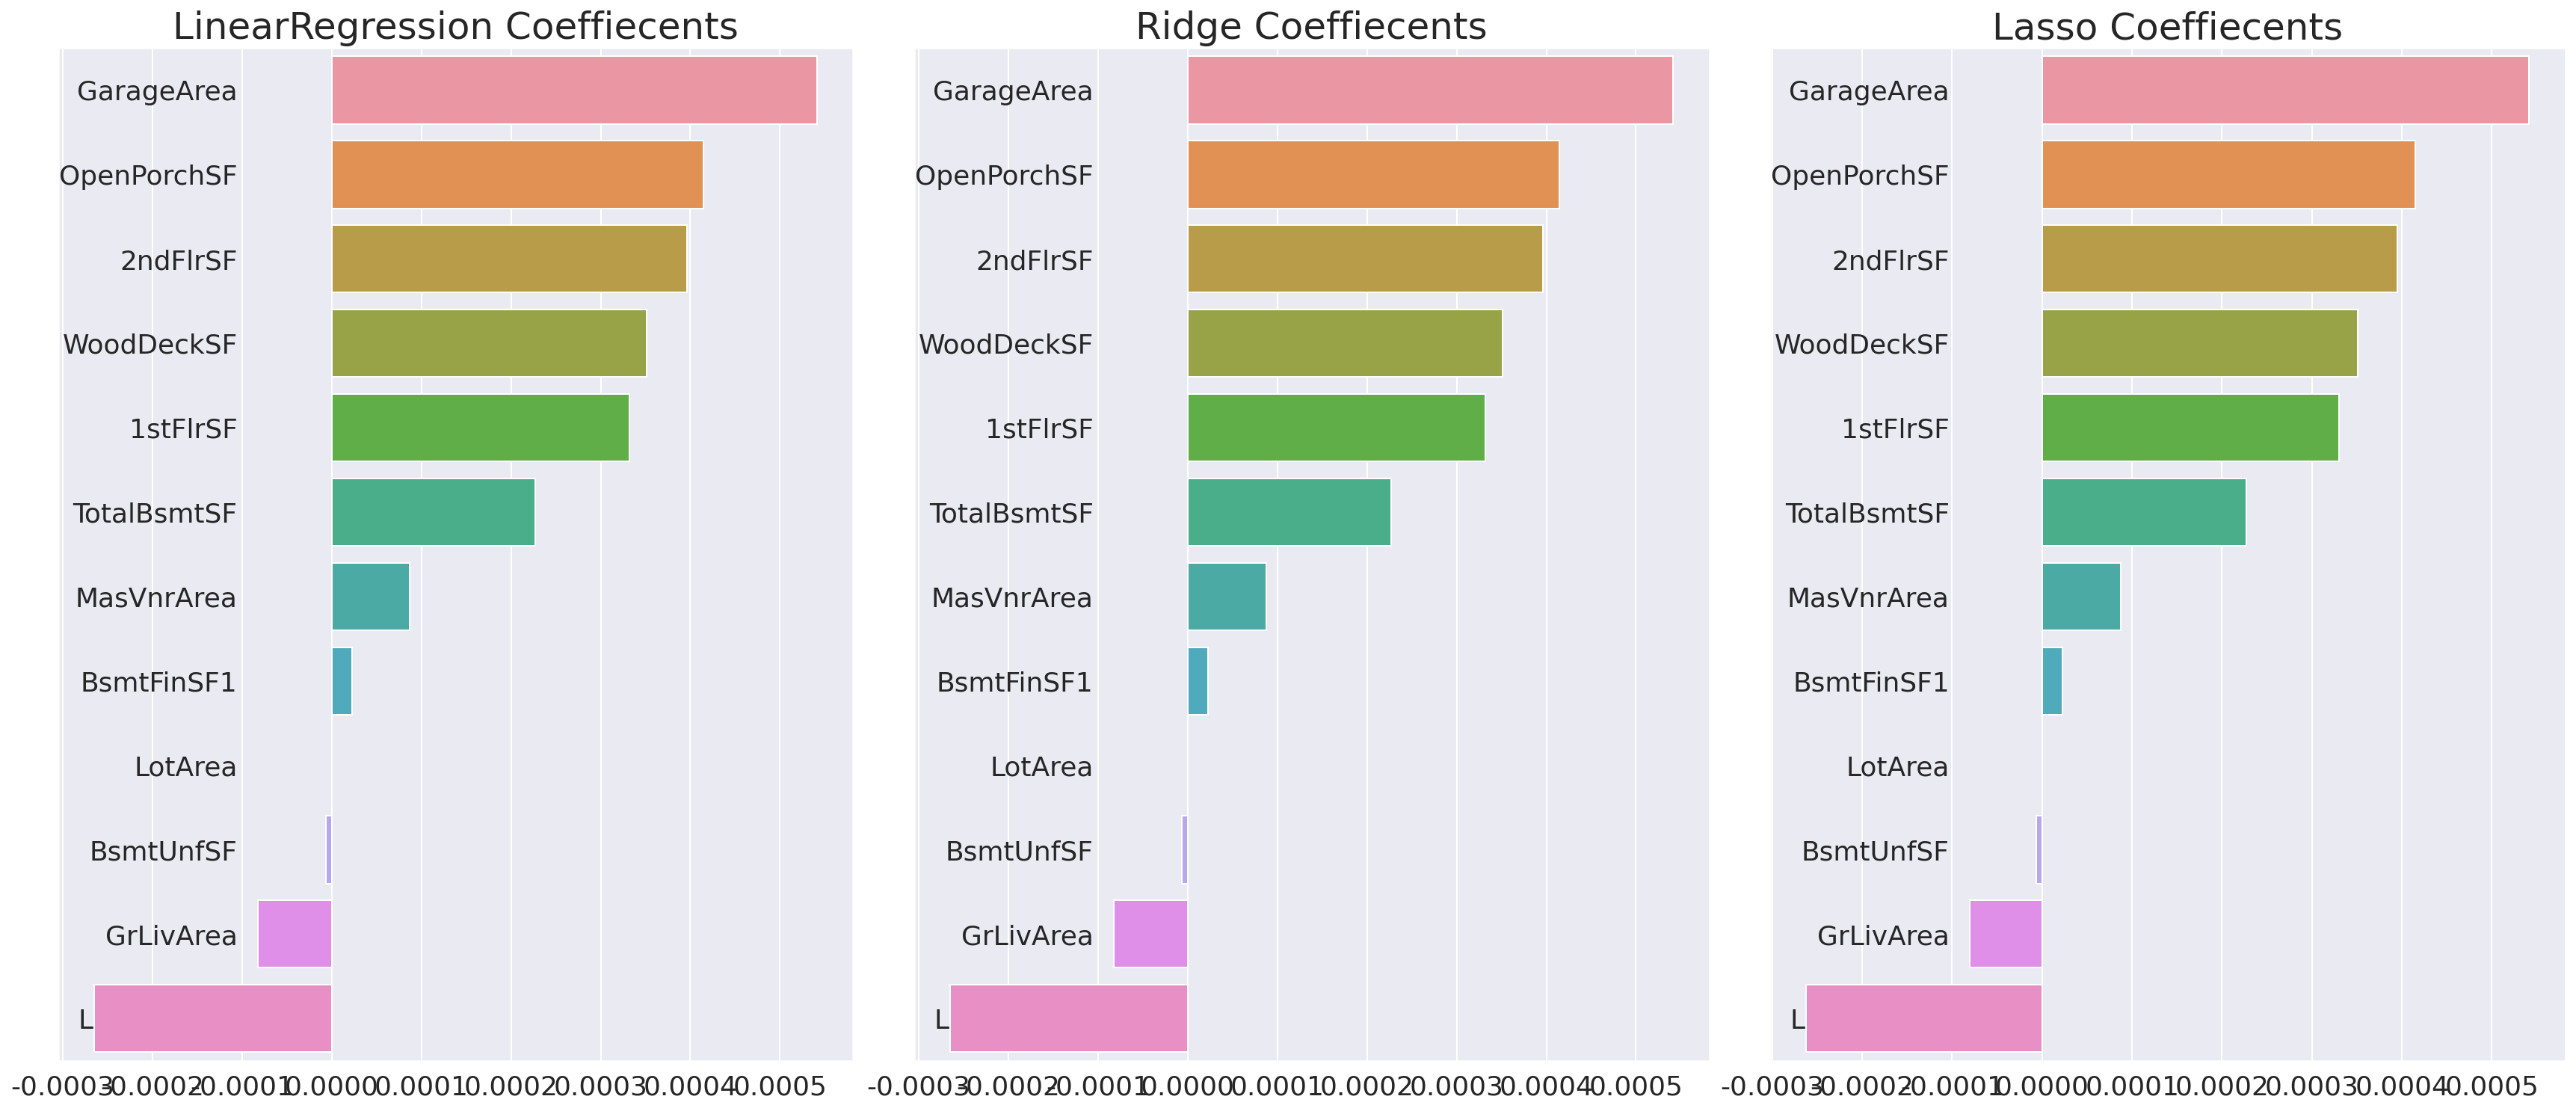

In [452]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

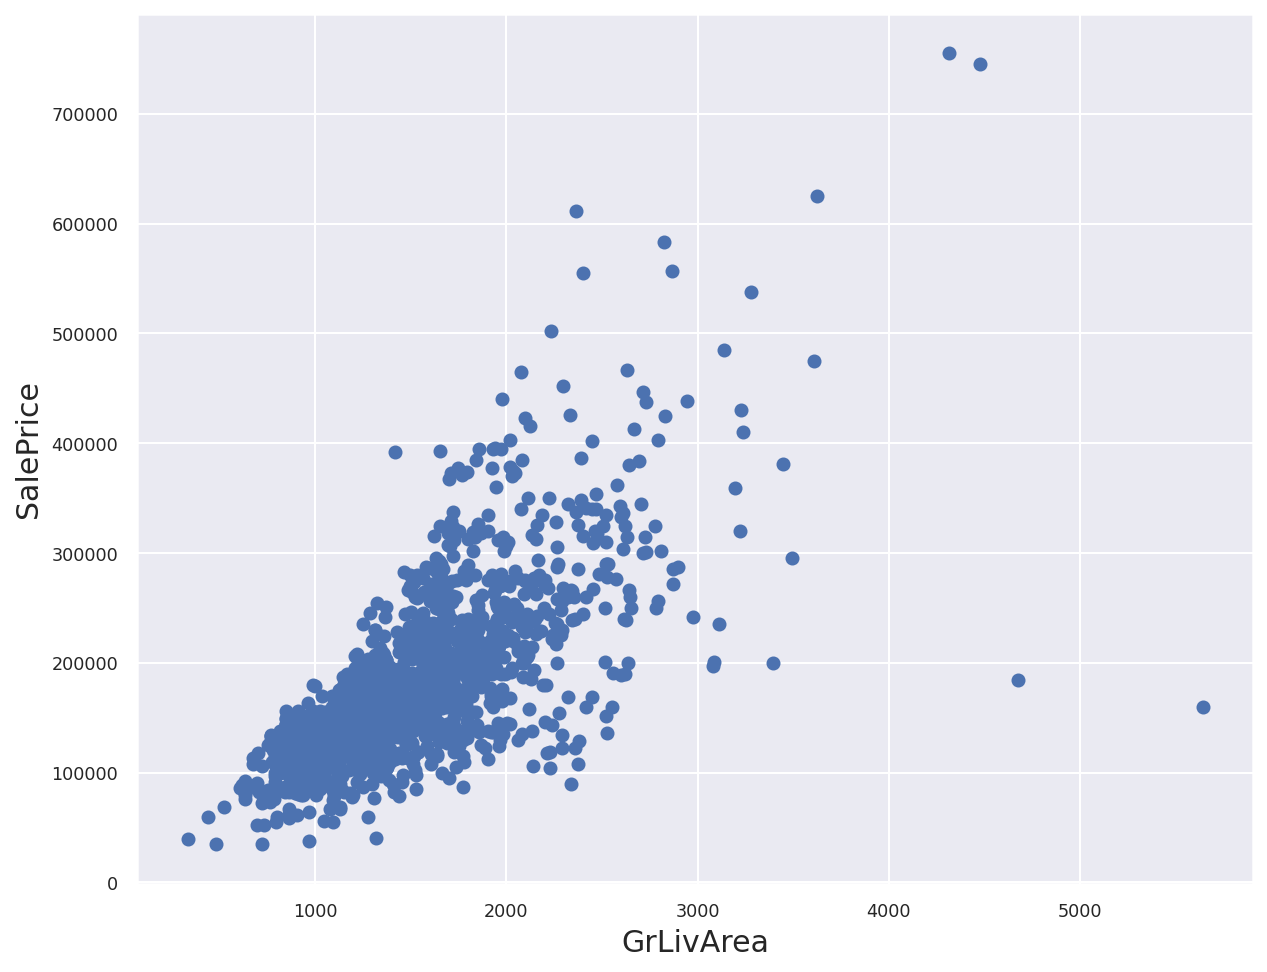

In [453]:
plt.scatter(x = house_train['GrLivArea'], y = house_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [454]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)


[08:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1851, 최적 alpha:{'n_estimators': 1000}


In [455]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1849, 최적 alpha:{'n_estimators': 1000}


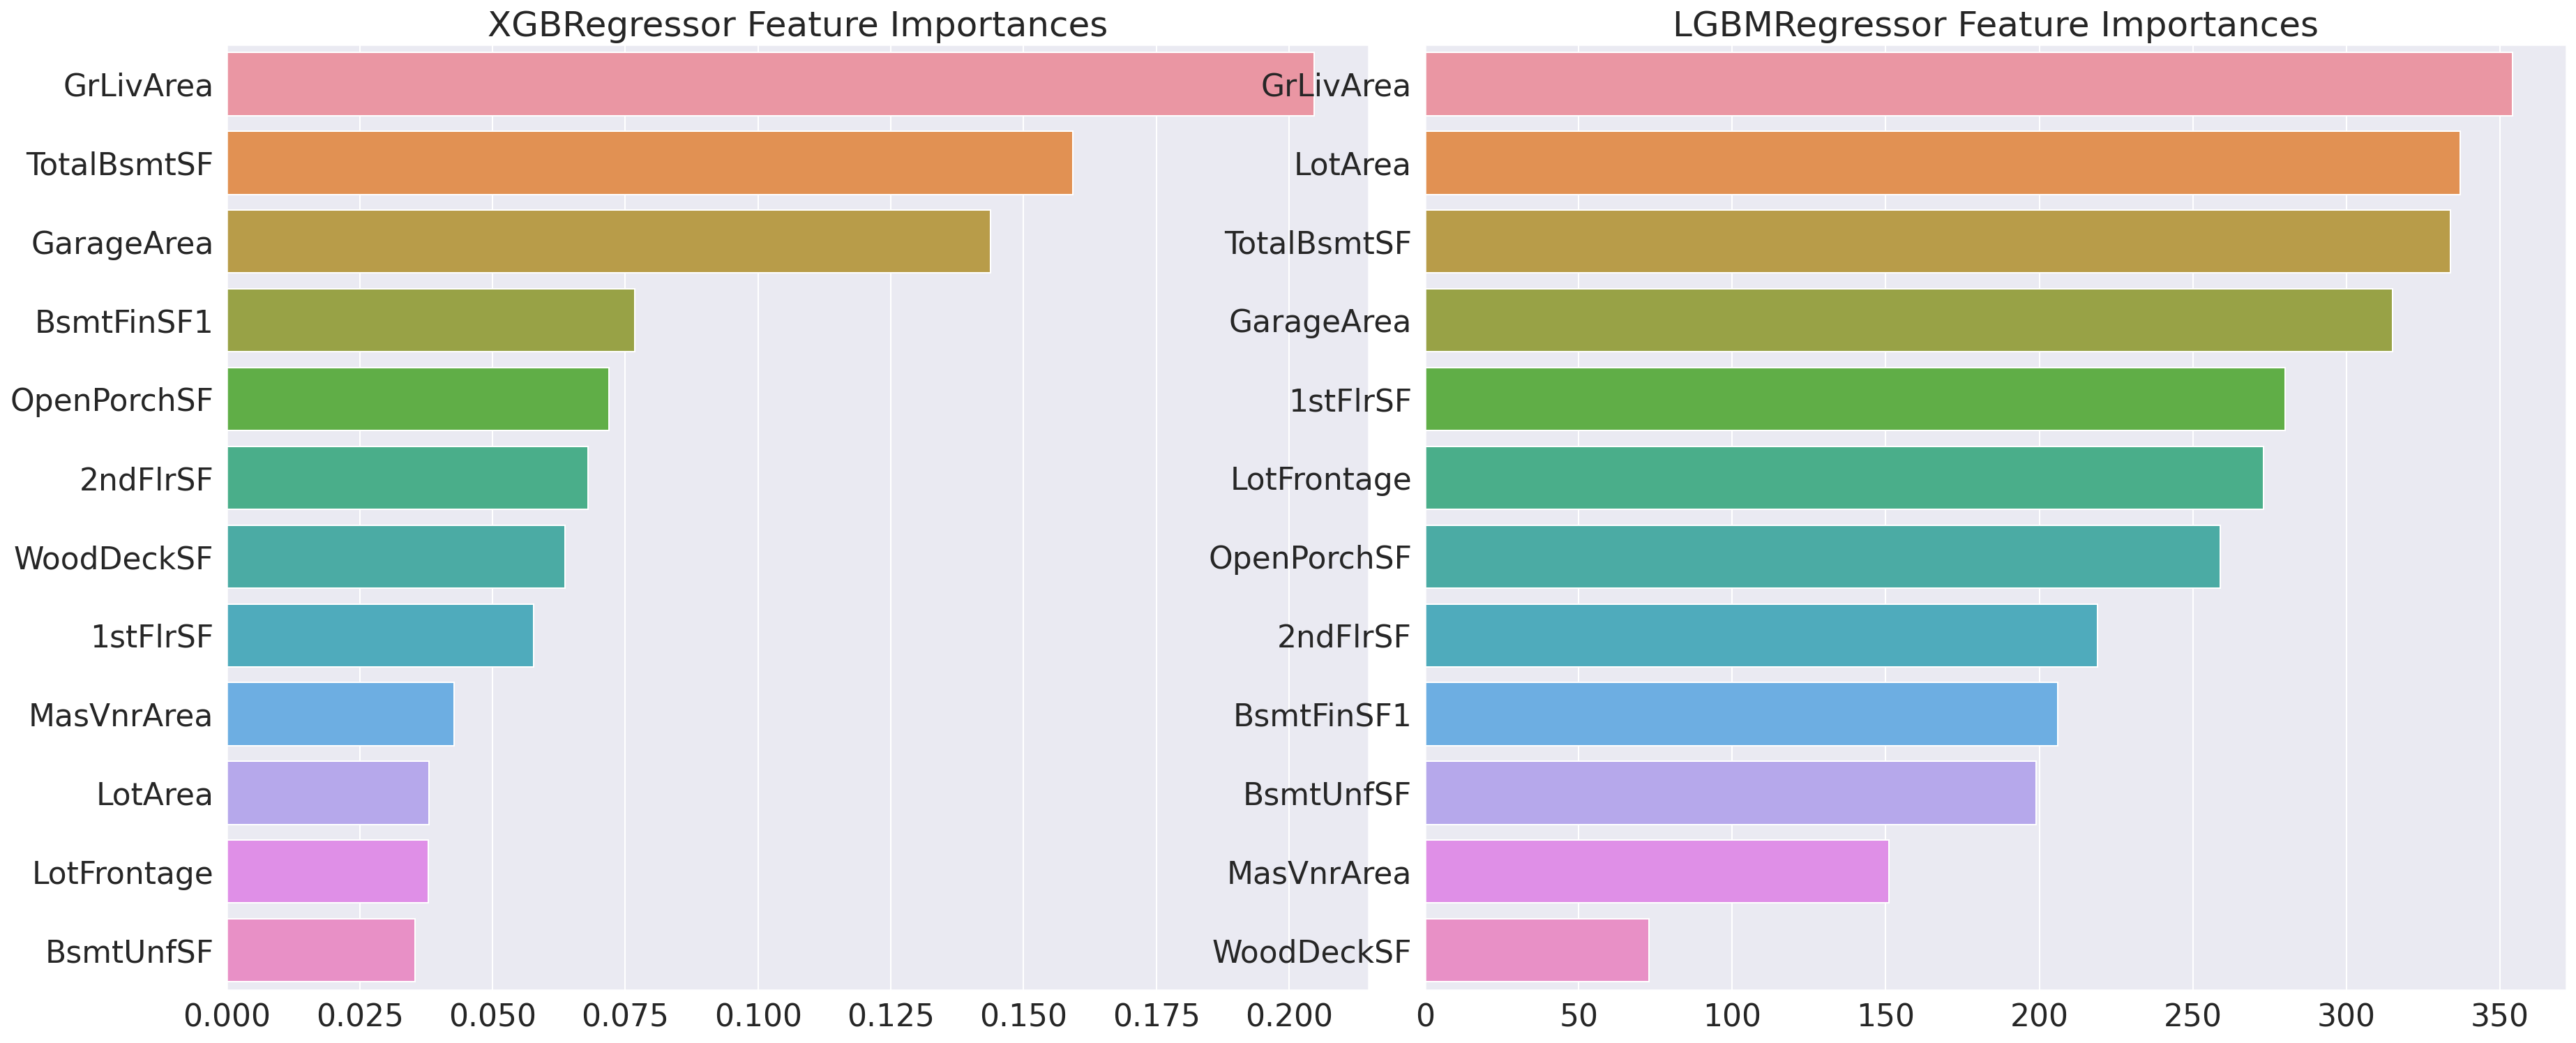

In [456]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [457]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.21030794632853556
Ridge 모델의 RMSE: 0.21030487105056417
Lasso 모델의 RMSE: 0.21031000600125652


In [458]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[08:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.18316868818415766
XGBM 모델의 RMSE: 0.18620160963231736
LGBM 모델의 RMSE: 0.18488786674492222


In [459]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [460]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[08:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[08:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[08:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[08:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[08:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  

In [461]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.18214466321516362
